In [235]:
import glob
import os
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [236]:
path = "./trainData"
print(os.path.join(path, "*.txt"))
txt_files = glob.glob(os.path.join(path, "*.txt"))
len(txt_files)
txt_files

./trainData/*.txt


['./trainData/01-D_AMairena.f0.Corrected.txt',
 './trainData/24-M1_AMairena-Martinete.f0.Corrected.txt',
 './trainData/63-M2_AMairena.f0.Corrected.txt']

In [237]:
def get_pitch_from_txtfile(path):
    file = open(path, 'r')
    content = file.read()
    lines = content.split('\n')
    lines = list(filter(None, lines))
    freq = []
    for i in lines:
        freq.append(float(i.split()[2]))
    return np.array(freq)


In [238]:
non_zero_all_files = []
non_zero = []
count = 0
freqs = get_pitch_from_txtfile(txt_files[0])
for j in range(len(freqs)):
    if (freqs[j] != 0.0):
        non_zero.append(freqs[j]) 
print(non_zero)


[143.918, 143.918, 150.538, 161.071, 175.532, 196.869, 227.253, 263.337, 300.775, 327.638, 347.759, 363.326, 376.894, 387.454, 393.773, 394.746, 393.053, 389.066, 384.123, 380.9, 378.734, 377.631, 378.787, 381.59, 385.902, 390.929, 394.455, 396.236, 398.111, 397.653, 395.169, 389.398, 384.093, 378.653, 372.655, 369.746, 369.2, 370.744, 377.787, 389.181, 402.851, 410.269, 416.793, 421.108, 419.685, 418.648, 417.771, 417.043, 415.761, 413.248, 410.169, 410.737, 411.707, 412.946, 414.283, 415.625, 417.187, 419.211, 418.624, 417.165, 414.906, 411.412, 409.039, 407.471, 406.702, 406.497, 406.849, 407.86, 409.782, 412.516, 416.17, 416.914, 416.161, 414.141, 411.259, 409.324, 407.447, 404.65, 401.597, 399.718, 399.617, 401.936, 404.812, 408.082, 410.838, 411.956, 412.129, 412.172, 411.963, 411.648, 411.249, 409.86, 408.816, 408.283, 407.769, 408.264, 409.757, 412.199, 413.989, 414.789, 413.446, 413.098, 412.593, 411.671, 411.251, 410.839, 410.433, 410.195, 410.09, 410.041, 409.94, 409.737, 40

In [239]:
pitches = ['c#3','d3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4','d4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', ]
frequencies = [138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94, 261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16]

def get_closest(frequency):
    array = np.full(len(frequencies), frequency)
    diff_array = np.abs(array - frequencies)
    min_ind=np.argmin(diff_array)
#     print()
    return(pitches[min_ind])

def get_closest_frequency_resolution(frequency, frequency_resolution):
    for i in range(len(frequencies)):
#         print(range(int(frequencies[i]-frequency_resolution), int(frequencies[i]+frequency_resolution+1)))
        if (frequency in range(int(frequencies[i]-frequency_resolution), int(frequencies[i]+frequency_resolution+1))):
#             print(f'i = {i}, frequency range:{frequencies[i]-frequency_resolution} to {frequencies[i]+frequency_resolution}, pitch = {pitches[i]}')
            return pitches[i]
    return -1
    
def get_note(frequency, frequency_resolution = 20):
    print(get_closest(frequency))
#     print(get_closest_frequency_resolution(frequency, frequency_resolution))    
#     return get_closest_frequency_resolution(frequency, frequency_resolution)
    return get_closest(frequency)


get_note(300, 10)

d4


'd4'

In [240]:
freq_res = 10
mapped_pitches= []
for i in range(len(non_zero)):
    mapped_pitches.append(get_note(non_zero[i], freq_res))
mapped_pitches

d3
d3
d3
e3
f3
g3
a#3
c4
d4
e4
f4
f#4
f#4
g4
g4
g4
g4
g4
g4
f#4
f#4
f#4
f#4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
f#4
f#4
f#4
f#4
f#4
f#4
g4
g4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g4
g4
g4
g4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g4
f#4
e4
d#4
d#4
c4
c#4
d#4
e4
f4
f4
f#4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
f#4
f#4
f#4
g4
g4
g4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
g4
f#4
g4
g4
g4
g4
g4
g4
g4
g4
g4
f#4
f#4
f#4
f#4
f#4
f#4
f#4
f#4
g4
g4
g4
g4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g#4
g4
g4
g4
g4
f#4
f#4
g#4
g#4
g#4
g4
g4
g4
g#4
g#4
g#4
g#4
g4
g4
g4
g4
g4
g4
f#4
f#4
f#4
f#4
g4
g4
g4
g#4

['d3',
 'd3',
 'd3',
 'e3',
 'f3',
 'g3',
 'a#3',
 'c4',
 'd4',
 'e4',
 'f4',
 'f#4',
 'f#4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'f#4',
 'f#4',
 'f#4',
 'f#4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g4',
 'f#4',
 'f#4',
 'f#4',
 'f#4',
 'f#4',
 'f#4',
 'g4',
 'g4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g4',
 'g4',
 'g4',
 'g4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g#4',
 'g4',
 'f#4',
 'e4',
 'd#4',
 'd#4',
 'c4',
 'c#4',
 'd#4',
 'e4',
 'f4

In [241]:
with open("pitches.txt", "w") as txt_file:
    for line in mapped_pitches:
        txt_file.write("".join(line) + "\n") # works with any number of elements in a line

In [242]:
from math import log2, pow

A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)


In [243]:
baselineF0= [516.796875, 430.6640625, 559.86328125, 301.46484375, 861.328125, 430.6640625, 301.46484375, 990.52734375]
# print(min(baselineF0), max(baselineF0))
baselinePitches = []
for i in baselineF0:
    baselinePitches.append(pitch(i))
baselinePitches

['C5', 'A4', 'C#5', 'D4', 'A5', 'A4', 'D4', 'B5']

In [247]:
baselineTransitions = []
for i in range(len(baselinePitches)-1):
    tuple = (str(baselinePitches[i])+"",str(baselinePitches[i+1]))
#     print(tuple)
    baselineTransitions.append(tuple)
# print(baselineTransitions)
G = nx.DiGraph()
G.add_nodes_from(baselinePitches)
G.add_edges_from(baselineTransitions)

d = nx.degree(G)
print(type(d))
degrees = []
for i in d:
    degrees.append(i[1])

<class 'networkx.classes.reportviews.DiDegreeView'>


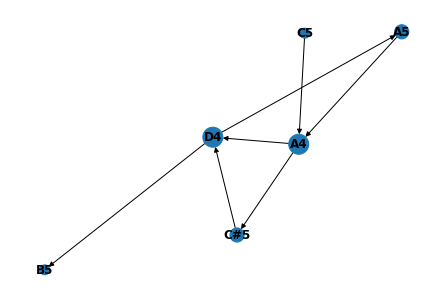

In [245]:
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, with_labels=True, font_weight='bold', node_size=[v * 100 for v in degrees])


In [246]:
nx.write_graphml(G, "./networkXGraphs/baseline.graphml")